<a href="https://colab.research.google.com/github/abhishek199677/Titanic-ML_Project/blob/main/Titanic_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  #for numerical data
import pandas as pd    #for tabular data
import seaborn as sns  #for visualisation

In [ ]:
df = pd.read_csv("/content/titanic.csv")

## **DATA Cleaning/ Pre-processing **


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df["Age"].isnull().sum()   #here Age column has less null values

df["Cabin"].isnull().sum()  #here Cabin column has more null values

687

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info() #here age and cabin has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.drop(columns = ["Cabin"], inplace = True)  #here dropping off Cabin column as it has more null values

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.drop(columns = ["PassengerId", "Name", "Ticket"], inplace = True)   #here also dropping few columns which are not that necessary

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.shape

(891, 8)

In [ ]:
df["Embarked"].isnull().sum()

2

In [ ]:
df["Age"].isnull().sum()

177

In [ ]:
df.isnull().sum() #here age is age is float and Embarked is object

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
#when ever it is object typ data need to handle first , where as numerical data has to be handled at the last,

In [ ]:
#using statistical analysis says when ever there is majority votes, use that particular category in this case 'S' is having majority
## so Embarked has missing values, so it has three categories in which 'S' is having majority of population now need to do handle missing values using 'S' category with value_counts as it is object typ

In [ ]:
df["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
df["Embarked"].fillna("S", inplace =True)  ## so Embarked has missing values, so it has three categories in which 'S' is having majority of population now need to do handle missing values using 'S' category with value_counts as it is object typ

<ipython-input-49-3a6059c117d1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna("S", inplace =True)  ## so Embarked has missing values, so it has three categories in which 'S' is having majority of population now need to do handle missing values using 'S' category with value_counts as it is object typ


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
#now Age has missing values as it is numeric need to handle using mean

In [ ]:
age_mean = df["Age"].mean()

In [ ]:
age_mean #average age is around 29-30 age people where more in the titanic ship

29.69911764705882

In [ ]:
df["Age"].fillna(age_mean, inplace =True) #So filling the missing values with age_mean

<ipython-input-63-2fc22fb9a50c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(age_mean, inplace =True) #So filling the missing values with age_mean


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## ***EDA (Exploratory Data Analysis)***

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#now ploting graph for "Survived" column, count plot will count the number of category it has in the "Survived" column

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# **Univariate Analysis taking only one column i.e on category column**:

<Axes: xlabel='Survived', ylabel='count'>

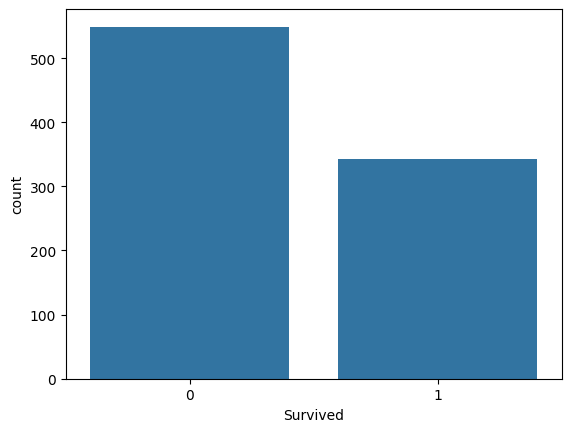

In [ ]:
sns.countplot(df, x = 'Survived') #the majority of people lost their lives

<Axes: xlabel='Pclass', ylabel='count'>

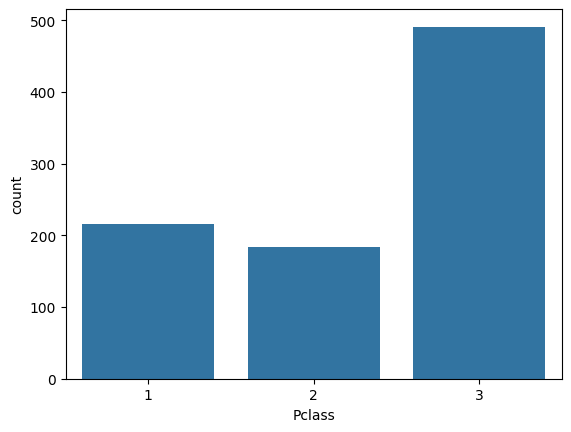

In [ ]:
sns.countplot(df, x = 'Pclass') #majority of deaths are from 3rd class as they are middle class people, where as less deaths are from 1st and 2nd class

<Axes: xlabel='Sex', ylabel='count'>

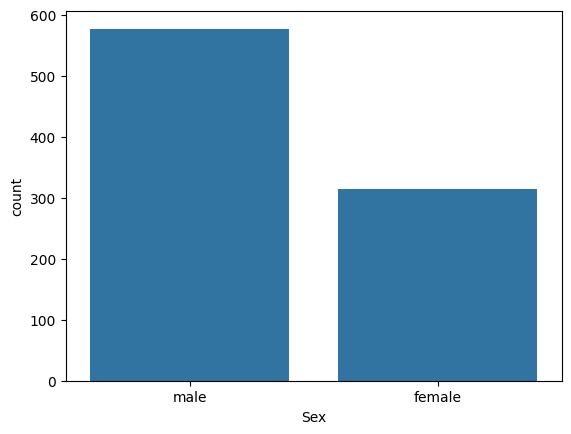

In [ ]:
sns.countplot(df, x = 'Sex') #death count of male is more compared to female

<Axes: xlabel='Embarked', ylabel='count'>

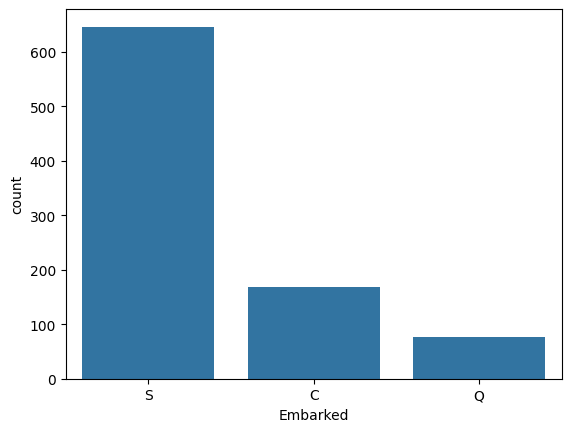

In [ ]:
sns.countplot(df, x = 'Embarked') #here majority of the lives lost are from 'S' place

# **Bivariate Analysis taking two column i.e on category column**

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Survived', ylabel='count'>

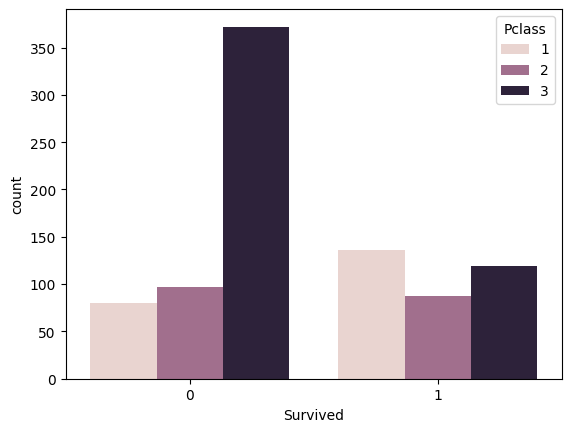

In [ ]:
sns.countplot(df, x = 'Survived', hue = 'Pclass') #here more deaths in 3rd class and most of the people are safe, is from the 1st class

<Axes: xlabel='Survived', ylabel='count'>

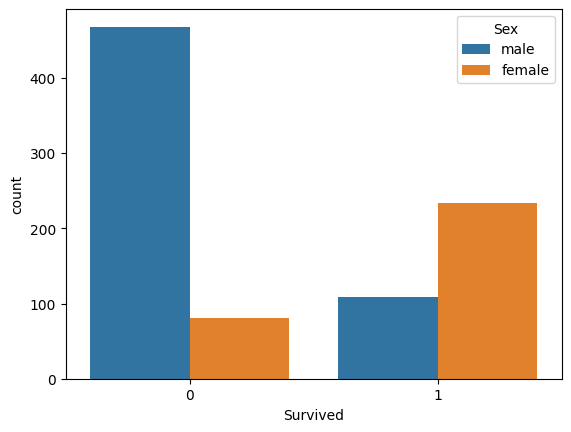

In [ ]:
sns.countplot(df, x = 'Survived', hue = 'Sex') #here most of the deaths from 1st class are male

<Axes: xlabel='Survived', ylabel='count'>

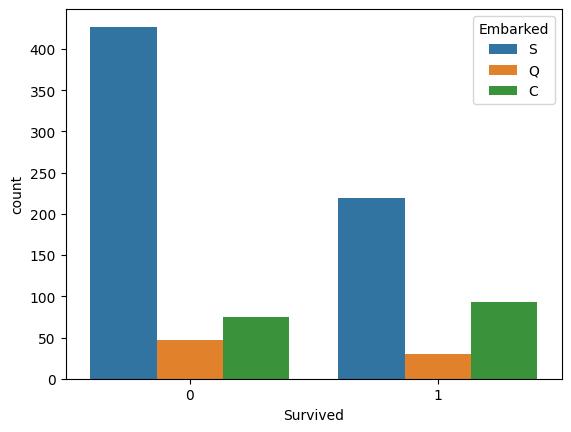

In [ ]:
sns.countplot(df, x = 'Survived', hue = 'Embarked')  #here majority of the lives lost are from the 'S' place

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# **Plotting graph for Numerical column**

<ipython-input-81-0838d2571596>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"]) #average age is around 29-30 age people where more in the titanic ship


<Axes: xlabel='Age', ylabel='Density'>

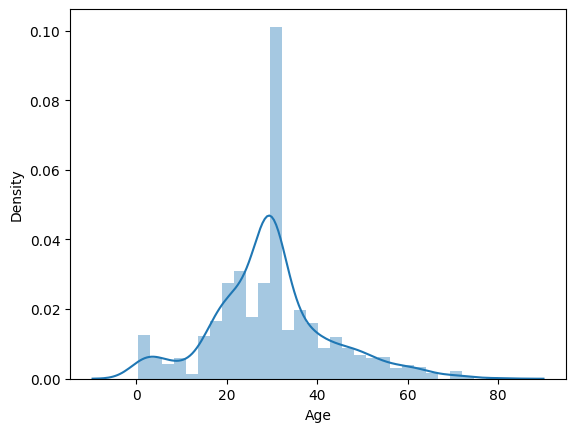

In [ ]:
sns.distplot(df["Age"]) #average age is around 29-30 age people where more in the titanic ship

In [ ]:
age_mean #even the above distplot shows the same average value around 29-30

29.69911764705882

<ipython-input-83-5eb648105375>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

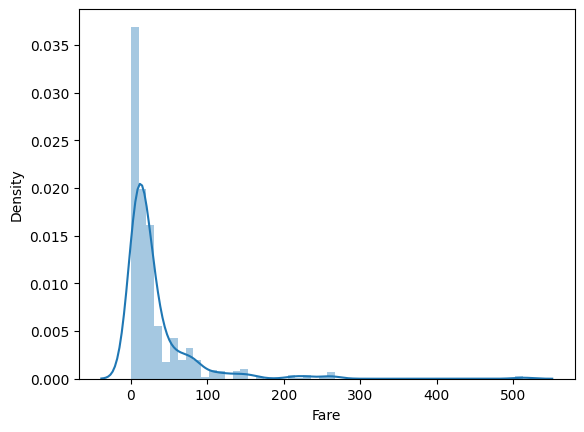

In [ ]:
sns.distplot(df["Fare"])

In [ ]:
fare_mean = df["Fare"].mean() #average fare/ticket is around 32-33 dollar for titanic ship

In [ ]:
fare_mean

32.204207968574636

# **FE (Feature Engineering )**

In [ ]:
#here creating new features and converting all the text data to numeric data

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#here SibSp(sibling spouse) and Parch(parent child) both can be considered as a family also adding 1, as 1 represents the alive person
##here we create a new column "Family" i.e new feature by combining both SibSp and Parch creating a new feature i.e family

In [ ]:
df['family'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [ ]:
df.drop(columns = ['SibSp', 'Parch'], inplace= True) #after the new family column/feature is created we need to drop SibSp and Parch

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [ ]:
df['family'].unique() #here if 1 then he’s alone, if more than 1 and less than 5 medium family and if more than 5 and above then large family

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [ ]:
#here if the 1 then he’s  alone, if more than 1 and less than 5 medium family and if more than 5 and above then large family

def family_type(number):
  if number == 1:
    return 'Alone'
  elif number > 1 and number <= 5:
    return 'Medium family'
  else:
    return 'Large family'

In [ ]:
df['family'] = df['family'].apply(family_type)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.0,7.2500,S,Medium family
1,1,1,female,38.0,71.2833,C,Medium family
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium family
4,0,3,male,35.0,8.0500,S,Alone


In [ ]:
df['family'].unique()

array(['Medium family', 'Alone', 'Large family'], dtype=object)

In [ ]:
df['Survived'].unique()

array([0, 1])

In [ ]:
df.shape

(891, 7)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.0,7.2500,S,Medium family
1,1,1,female,38.0,71.2833,C,Medium family
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium family
4,0,3,male,35.0,8.0500,S,Alone


# **Convertion of text data to numeric data**

In [ ]:
dummees = pd.get_dummies(df, columns = ['Pclass', 'Sex', 'Embarked', 'family'], drop_first=True)  #here dummies will be working on categorical columns

In [ ]:
dummees

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_Large family,family_Medium family
0,0,22.000000,7.2500,False,True,True,False,True,False,True
1,1,38.000000,71.2833,False,False,False,False,False,False,True
2,1,26.000000,7.9250,False,True,False,False,True,False,False
3,1,35.000000,53.1000,False,False,False,False,True,False,True
4,0,35.000000,8.0500,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,True,False,True,False,True,False,False
887,1,19.000000,30.0000,False,False,False,False,True,False,False
888,0,29.699118,23.4500,False,True,False,False,True,False,True
889,1,26.000000,30.0000,False,False,True,False,False,False,False


In [139]:
X = dummees.iloc[:, 1:]  #slicing all the independent columns

In [ ]:
X

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_Large family,family_Medium family
0,22.000000,7.2500,False,True,True,False,True,False,True
1,38.000000,71.2833,False,False,False,False,False,False,True
2,26.000000,7.9250,False,True,False,False,True,False,False
3,35.000000,53.1000,False,False,False,False,True,False,True
4,35.000000,8.0500,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,True,False,True,False,True,False,False
887,19.000000,30.0000,False,False,False,False,True,False,False
888,29.699118,23.4500,False,True,False,False,True,False,True
889,26.000000,30.0000,False,False,True,False,False,False,False


In [138]:
y = dummees.iloc[:, 0]    #slicing all the dependent columns

In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# **Train - Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# **X_train = input feature**
# **y_train = output feature**
# **X_test = input feature of test data**
# **y_test = output feature of test data**



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.head() #input feature

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_Large family,family_Medium family
140,29.699118,15.2458,False,True,False,False,False,False,True
439,31.000000,10.5000,True,False,True,False,True,False,False
817,31.000000,37.0042,True,False,True,False,False,False,True
378,20.000000,4.0125,False,True,True,False,False,False,False
491,21.000000,7.2500,False,True,True,False,True,False,False


In [ ]:
y_train.head() #output feature

,Survived
140,0
439,0
817,0
378,0
491,0


In [ ]:
X_test.head() #input feature of test data

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_Large family,family_Medium family
495,29.699118,14.4583,False,True,True,False,False,False,False
648,29.699118,7.5500,False,True,True,False,True,False,False
278,7.000000,29.1250,False,True,True,True,False,True,False
31,29.699118,146.5208,False,False,False,False,False,False,True
255,29.000000,15.2458,False,True,False,False,False,False,True


In [ ]:
y_test.head() #output feature of test data

,Survived
495,0
648,0
278,0
31,1
255,1


In [ ]:
X_train.shape  #80% data for training

(712, 9)

In [ ]:
X_test.shape    #20% data for testing

(179, 9)

In [ ]:
print(X_train.shape) #input feature
print(y_train.shape)  #output feature

(712, 9)
(712,)


In [ ]:
print(X_test.shape)   #input feature of test data
print(y_test.shape)   #output feature of test data

(179, 9)
(179,)


# **Machine Learning Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier  #using this model becoz it is a classification problem

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)   #1st the model has to be trained

RandomForestClassifier()

In [ ]:
pred = model.predict(X_test)  #pedicted value  #here the model is tested

In [ ]:
pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1])

In [ ]:
y_test  #actual value

,Survived
495,0
648,0
278,0
31,1
255,1
...,...
780,1
837,0
215,1
833,0


# **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, pred)  #here the accuracy is 83% which is a good model

0.8435754189944135

In [ ]:
import pickle
pickle.dump(model, open('final_proj.pkl' , 'wb'))